# Discussione degli esercizi di laboratorio del 4 dicembre 2023

Riguardiamo intanto la funzione `somma_riga` che, data una matrice `l`, calcola la somma dei valori presenti riga per riga e restituisce il risultato. Per questa funzione, come per molte altre che restituiscono una lista, sono possibili due approcci:
  1. Costruire la lista risultato mano a mano che se ne calcolano i valori, partendo da una lista vuota e aggiungendo i nuovi valori con `append`.
  2. Costruire da subito una lista della lunghezza giusta, riempita con un valore costante (ad esempio zero)

La funzione `somma_righe` qui sotto usa il primo approccio. Notare le istruzioni `print` che si trovano lì solo a scopo di debugging: ci mostrano in che ordine vengono visitati gli elementi della matrice, una riga dopo l'altra.

In [1]:
def somma_righe(l):
    """
    Data una matrice numerica l, restituisce una lista con la somme dei valori delle righe di l.
    """
    # la variabile risultato conterrà le somme delle righe
    risultato = [ ]
    for num_riga in range(len(l)):
        # calcolo la somma degli elementi nella riga num_riga
        somma = 0
        for num_colonna in range(len(l[num_riga])):
            print("num_riga: ",num_riga, "num_colonna: ",num_colonna)
            somma += l[num_riga][num_colonna]
        # aggiungo la somma al risultato
        risultato.append(somma)
    return risultato

In [2]:
somma_righe([[1,2,3],[4,5,6]])

num_riga:  0 num_colonna:  0
num_riga:  0 num_colonna:  1
num_riga:  0 num_colonna:  2
num_riga:  1 num_colonna:  0
num_riga:  1 num_colonna:  1
num_riga:  1 num_colonna:  2


[6, 15]

La funzione `somma_righe3` qui sotto usa invece il secondo approccio. Il nome della funzione può sembrare strano, ma è stato scelto per coerenza con la stessa funzione nel notebook del 30 novembre.

In [3]:
def somma_righe3(l):
    """
    Data una matrice numerica l, restituisce una lista con la somme dei valori delle righe di l.
    """
    # genera una lista della dimensione giusta (il numero di righe di l) inizializzata con 0
    risultato = [ 0 ] * len(l)
    for num_riga in range(len(l)):
        for num_colonna in range(len(l[num_riga])):
            # aggiunge l'elemento l[num_riga][num_colonna] alla componente di risultato che contiene
            # la somma degli elementi della riga num_riga.
            risultato[num_riga] += l[num_riga][num_colonna]
    return risultato

In [4]:
somma_righe3([[1,2,3],[4,5,6]])

[6, 15]

# Esercizio 1

Scrivere la funzione `somma_colonne` che prende una matrice di numeri in input (rappresentata come una lista di liste) e restituisce la somma delle colonne della matrice. Ad esempio, se

```python
l = [
  [1, 2, 3],
  [4, 5, 6]
]
```

allora `somma_colonne(l)` restituisce la lista `[5, 7, 9]`. Potete supporre che la tabella sia rettangolare, ovvero **tutte le righe hanno la stessa lunghezza**.

Iniziamo usando l'approccio 1. In questo caso è importante che gli elementi della matrice vengano visitati per colonna e non per riga: prima deve essere visitata tutta la prima colonna, in maniera tale che i suoi elementi possano essere sommati ed inseriti nella lista risultato; poi tutta la seconda colonna, e così via. Per visitare gli elementi in questo ordine, è sufficiente invertire le due istruzioni `for` in maniera tale che il for esterno sia quello che scandisce i numeri di colonna e quello interno scandisce i numeri di riga. Si ottiene questo:

In [5]:
def somma_colonne(l):
    """
    Data una matrice numerica l, restituisce una lista con la somme dei valori delle righe di l.
    """
    risultato = [ ]
    # la variabile risultato conterrà le somme delle righe
    for num_colonna in range(len(l[num_riga])):
        # calcolo la somma degli elementi nella colonna num_colonna
        somma = 0
        for num_riga in range(len(l)):
            print("num_riga: ",num_riga, "num_colonna: ",num_colonna)
            somma += l[num_riga][num_colonna]
        # aggiungo la somma al risultato
        risultato.append(somma)
    return risultato

Questo ovviamente non può funzionare, perché nel for esterno si fa riferimento a `num_riga`, che viene definito solo successivamente nel `for` interno. Siccome la nostra matrice è rettangolare, il numero di colonne è fisso, e lo si può ricavare semplicemente calcolando la lunghezza di una riga qualunque: usiamo la prima riga (la numero zero). Otteniamo:

In [6]:
def somma_colonne(l):
    """
    Data una matrice numerica l, restituisce una lista con la somme dei valori delle righe di l.
    """
    # la variabile risultato conterrà le somme delle righe
    risultato = [ ]
    # len(l[0]) è il numero di colonne della matrice rappresentata da l
    # (questo perché stiamo supponendo che la matrice sia rettangolare, non frastagliata)
    for num_colonna in range(len(l[0])):
        # calcolo la somma degli elementi nella colonna num_colonna
        somma = 0
        for num_riga in range(len(l)):
            print("num_riga: ",num_riga, "num_colonna: ",num_colonna)
            somma += l[num_riga][num_colonna]
        # aggiungo la somma al risultato
        risultato.append(somma)
    return risultato

Dalle print di debugging si nota il diverso ordine con cui vengono visitate le celle della matrice.

In [7]:
somma_colonne([[1,2,3],[4,5,6]])

num_riga:  0 num_colonna:  0
num_riga:  1 num_colonna:  0
num_riga:  0 num_colonna:  1
num_riga:  1 num_colonna:  1
num_riga:  0 num_colonna:  2
num_riga:  1 num_colonna:  2


[5, 7, 9]

La versione che segue, usa l'approccio di creare prima la lista risultato, riempita di 0. In questo caso, non è importante l'ordine in cui si visita la matrice, va bene anche quello originale per righe. L'importante è che ogni elemento della matrice venga sommato al corretto elemento della matrice risultato. Se nel caso di `somma_righe3` l'elemento `l[num_riga][num_colonna]` doveva contribuire alla somma della riga `num_riga` (da cui l'istruzione `risultato[num_riga] += l[num_riga][num_colonna]`), adesso lo stesso elemento deve contribuire alla somma della colonna `num_colonna`, quindi l'istruzione di somma corretta è `risultato[num_colonna] += l[num_riga][num_colonna]`.

In [8]:
def somma_colonne3(l):
    """
    Data una matrice numerica l, restituisce una lista con la somme dei valori delle colonne di l.
    """
    # genera una lista della dimensione giusta (il numero di colonne di l) inizializzata con 0
    risultato = [ 0 ] * len(l[0])
    for num_riga in range(len(l)):
        for num_colonna in range(len(l[num_riga])):
            # aggiunge l'elemento l[num_riga][num_colonna] alla componente di risultato che contiene
            # la somma degli elementi della colonna num_colonna.
            risultato[num_colonna] += l[num_riga][num_colonna]
    return risultato

In [9]:
somma_colonne3([[1,2,3],[4,5,6]])

[5, 7, 9]

## Esercizio 3

Scrivere una funzione somma_matrici(a, b) che prende in input due matrici a e b (anche frastagliate, rappresentate come liste di liste) e modifica sul posto la matrice a aggiungendo ad ogni elemento il corrispondente elemento di b. Potete supporre che le matrici a e b siano compatibili, ciò abbiano lo stesso numero di riga e le righe della stessa lunghezza. Ad esempio, se

a = [
  [ 1, 2, 3 ],
  [ 4, 5 ]
]

e

b = [
  [ 0, 1, -1 ],
  [ 2, 3 ]
]

dopo l'esecuzione di somma_matrici(a, b) la lista b sarà invariata ma la lista a conterrà:

[
  [ 1, 3, 2 ],
  [ 6, 8 ]
]

Seguiamo l'approccio n. 2, ovvero creiamo inizialmente una matrice della dimensione giusta (n righe * n colonne) tutta riempita di 0, e succesivamente la modifichiamo rimpiazzando la diagonale con degli 1. Ma come creiamo una matrice piena di zeri ?

### Creare una matrice nulla

Supponiano di voler creare una matrice 3 * 3. Sappiamo già come creare una lista lunga 3 inizializzata con 0 usando l'operatore di ripetizione.

In [11]:
riga = [0] * 3
riga

[0, 0, 0]

Una idea potrebbe essere quella di creare una nuova lista, i cui elementi sono tutte copie di riga, di nuovo usando l'operatore di ripetizione

In [12]:
# è equivalente a [ riga, riga, riga ]
matrice = [ riga ] * 3
matrice

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

Ottimo! Semra che ci siamo riusciti.... ma purtroppe le cose non stanno come pensiamo. Supponiamo di cambiare l'emento in alto a sx della matrice.

In [13]:
matrice[0][0] = 1

Ci aspettiamo che adesso `matrice` sia:
```python
[[1, 0, 0], [0, 0, 0], [0, 0, 0]]
```


ed invece

In [14]:
matrice

[[1, 0, 0], [1, 0, 0], [1, 0, 0]]

Tutta la prima colonna è diventata piena di 1 !!!! Perché ? Il problema è che gli elementi che compongo  'matrice' (le righe) non sono semplicemente uguali, ma sono **identich**, ovvero si riferiscono esattamente allo stesso oggetto. La situazione della memoria dopo l'esecuzione di queste istruzioni è la seguente:

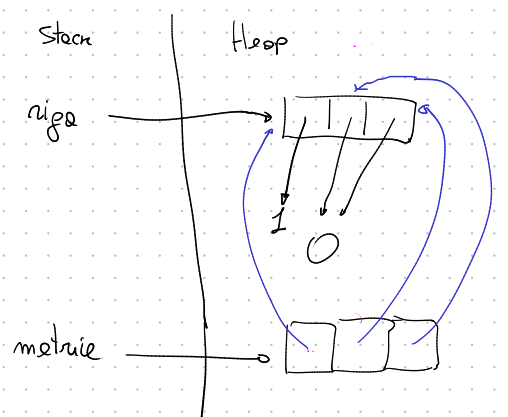

Occorre pertanto procedere in modo diverso. Le righe le possiamo creare tranquillamente con l'operatore di ripetizione, perché per i tipi immutabili come gli interi non c'è nessun problema se due celle della lista sono alias. Ma le righe dobbiamo crearle una alla volta ed inserirle dentro la matrice risultato, come nella funzione che segue.

In [15]:
def matrice_nulla(nrighe, ncolonne):
    """
    Restituisce una matrice di nrighe * ncolonne tutta piena di 0.
    """
    risultato = []
    # ripeto per nrighe
    for _ in range(nrighe):
        # creo una riga costutita da ncolonne zeri
        riga = [0] * ncolonne
        # aggiungo la riga al risultato
        risultato.append(riga)
    return risultato

Il risultato di `matrice_nulla` si comporta come ci si aspetta.

In [16]:
matrice = matrice_nulla(3, 3)
matrice

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [17]:
matrice[0][0] = 1
matrice

[[1, 0, 0], [0, 0, 0], [0, 0, 0]]

Il disegno seguente mostra la situazione della memoria dopo l'esecuzione delle seguenti istruzioni (ovvero le stesse istruzioni che vengono eseguite dalla nuova versione di `matrice_nulla` quando il numero di righe è di colonne è uguale a 3).
```python
risultato = []
for i in range(3):
    riga = [0] * 3
    risultato.append(riga)
```

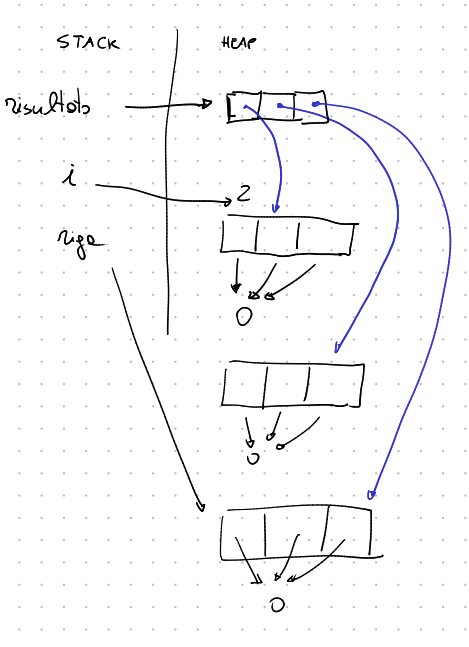


**Attenzione!** Si potrebbe pensare di ottimizzare il codice di `matrice_nulla` spostando l'istruzione `riga = [0] * ncolonne` fuori dal ciclo for (tanto la riga da creare è sempre la stessa!). Ma facendo così si reintroduce il problema che le righe che vengono inserire dentro la variabile `risultato` non sono semplicemente uguali, sono identiche.

Notare che esistono modi più compatti di creare una matrice piena di 0 (o di un qualunque valore costante) ma richiedono l'uso di funzionalità di Python che esulano dal programma del corso. Giusto a titolo di esempio (e ripeto che non fa parte del programma), la seguente istruzione creare una matrice di 3 righe e 5 colonne usando la *for comprehension*.

In [18]:
[ [0] * 5 for _ in range(3) ]

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

### Riempire la matrice nulla

Ora che abbiamo imparato come creare una matrice nulla, torniamo al problema originale di creare una matrice identica di ordine `n` (cioè con `n` righe ed `n` colonne). L'idea è di creare dapprima una matrice nulla di ordine `n`, poi riempire la diagonale con 1.

In [21]:
def matrice_identica(n):
    # creo un matrice nulla di ordine n
    m = matrice_nulla(n, n)
    # metto gli elementi della diagonale principale ad 1
    for i in range(n):
        m[i][i] = 1
    return m

Notare che non usiamo due indici per scandire la matrice perché non ci interessa scandire tutti gli elementi della matrice `m`, ma solo quelli della diagonale principale, ovvero quelli in cui l'indice di riga è uguale all'indice di colonna. Un solo ciclo `for` è quindi sufficiente.

In [20]:
matrice_identica(3)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

### Costruire direttamente la matrice identica

Come alternativa, vediamo come è possibile costruire direttamnte una matrice identica di ordine `n` senza prima passare dalla matrice nulla. Possiamo partire dal codice di `matrice_nulla`, ma ogni volta che creiamo una nuova `riga`, prima inserirla in `risultato` la modifichiamo aggiungendo gli 1 dove richiesto.

In [22]:
def matrice_identica2(n):
    risultato = []
    # ripeto per n righe
    for i in range(n):
        # creo una riga costituita da n zeri
        riga = [0] * n
        # se i = 0 (prima riga), devo mettere un 1 in riga[0]
        # se i = 1 (seconda riga), devo mettere un 1 in riga[1]
        # in generale, devo mettere un 1 in riga[i]
        riga[i] = 1
        risultato.append(riga)
    return risultato

matrice_identica2(4)

## Esercizio 3

Scrivere una funzione somma_matrici(a, b) che prende in input due matrici a e b (anche frastagliate, rappresentate come liste di liste) e modifica sul posto la matrice a aggiungendo ad ogni elemento il corrispondente elemento di b. Potete supporre che le matrici a e b siano compatibili, ciò abbiano lo stesso numero di riga e le righe della stessa lunghezza. Ad esempio, se

```python
a = [
  [ 1, 2, 3 ],
  [ 4, 5 ]
]
```
e
```python
b = [
  [ 0, 1, -1 ],
  [ 2, 3 ]
]
```

dopo l'esecuzione di `somma_matrici(a, b)` la lista `b` sarà invariata ma la lista `a` conterrà:
```python
[
  [ 1, 3, 2 ],
  [ 6, 8 ]
]
```

È sufficiente visitare tutte le posizioni delle matrici `a` e `b`, ma attenzione, non sono necessari (anzi, sono dannosi) quattro cicli for, ne sono suficienti due: infatti gli stessi indici che usiamo per accedere agli elementi della matrice `a` li possiamo usare anche per accedere agli elementi (nella stessa posizione) della matrice `b`.

In [27]:
def somma_matrici(a, b):
    # Scorre tutti gli elementi della matrice `a`, e ad essi somma l'elemento
    # della matrice `b` che si trova nella stessa posizione.
    for num_riga in range(len(a)):
        for num_colonna in range(len(a[num_riga])):
            a[num_riga][num_colonna] += b[num_riga][num_colonna]

Proviamo questa funzione con gli input di cui sopra.

In [32]:
a = [
  [ 1, 2, 3 ],
  [ 4, 5 ]
]
b = [
  [ 0, 1, -1 ],
  [ 2, 3 ]
]
somma_matrici(a,b)

Vediamo che la matrice `a` contiene la somma delle due matrici.

In [30]:
a

[[1, 3, 2], [6, 8]]

Mentre la matrice `b` è invariata.

In [31]:
b

[[0, 1, -1], [2, 3]]